In [1]:
#used an environment with directml
# with the help of https://www.youtube.com/watch?v=gjVFH7NHB9s
#ref to choose the env in jupyter notebook: https://towardsdatascience.com/get-your-conda-environment-to-show-in-jupyter-notebooks-the-easy-way-17010b76e874

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:DML:0', device_type='DML'),
 PhysicalDevice(name='/physical_device:DML:1', device_type='DML')]

In [3]:
tf.test.is_gpu_available()

True

In [4]:
from tensorflow.python.client import device_lib

device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 11589009931138596765,
 name: "/device:DML:0"
 device_type: "DML"
 memory_limit: 3487677850
 locality {
 }
 incarnation: 6129135154559838390
 physical_device_desc: "{\"name\": \"Intel(R) HD Graphics 620\", \"vendor_id\": 32902, \"device_id\": 22806, \"driver_version\": \"27.20.100.9664\"}",
 name: "/device:DML:1"
 device_type: "DML"
 memory_limit: 1581625755
 locality {
 }
 incarnation: 4958651781742167074
 physical_device_desc: "{\"name\": \"Radeon (TM) R5 M430\", \"vendor_id\": 4098, \"device_id\": 26208, \"driver_version\": \"27.20.20904.4000\"}"]

In [5]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [6]:
x_train.shape

(50000, 32, 32, 3)

In [7]:
x_train[0].shape

(32, 32, 3)

In [8]:
y_train[0]

array([6], dtype=uint8)

In [9]:
def plot_sample(index):
    plt.figure(figsize=(10,1))
    plt.imshow(x_train[index])

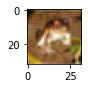

In [10]:
plot_sample(0)

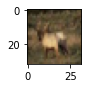

In [11]:
plot_sample(3)

In [12]:
y_train[3]

array([4], dtype=uint8)

In [13]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [14]:
classes[y_train[3][0]]

'deer'

In [15]:
X_train_scaled = x_train/255
X_test_scaled = x_test/255

In [16]:
# do one hot encoding
y_train_categorical = keras.utils.to_categorical(
    y_train,num_classes=10,dtype='float32'
)
y_train_categorical[3]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [17]:
y_test_categorical = keras.utils.to_categorical(
    y_test,num_classes=10,dtype='float32'
)

In [26]:
#model building
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid'),
])

model.compile(
    optimizer='SGD',
    loss='categorical_crossentropy', #if one hot encoded
    metrics=['accuracy']
)

model.fit(X_train_scaled,y_train_categorical,epochs=50)

Train on 50000 samples
Epoch 1/50
50000/50000 [==============================] - 110s 2ms/sample - loss: 1.8628 - acc: 0.3331
Epoch 2/50
50000/50000 [==============================] - 108s 2ms/sample - loss: 1.6579 - acc: 0.4125
Epoch 3/50
50000/50000 [==============================] - 108s 2ms/sample - loss: 1.5720 - acc: 0.4413s - loss: 1.5724 - acc:
Epoch 4/50
50000/50000 [==============================] - 109s 2ms/sample - loss: 1.5102 - acc: 0.4690
Epoch 5/50
50000/50000 [==============================] - 111s 2ms/sample - loss: 1.4602 - acc: 0.4840
Epoch 6/50
50000/50000 [==============================] - 111s 2ms/sample - loss: 1.4118 - acc: 0.5023s - loss: 1.4119  - ETA: 1s - loss: 1
Epoch 7/50
50000/50000 [==============================] - 121s 2ms/sample - loss: 1.3765 - acc: 0.5165
Epoch 8/50
50000/50000 [==============================] - 128s 3ms/sample - loss: 1.3399 - acc: 0.5271
Epoch 9/50
50000/50000 [==============================] - 122s 2ms/sample - loss: 1.3089 - ac

In [44]:
classes[y_test[1][0]]

'ship'

In [43]:
classes[np.argmax(model.predict(np.array([X_test_scaled[1]])))]

'ship'

In [23]:
def get_model():
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(32,32,3)),
        keras.layers.Dense(3000,activation='relu'),
        keras.layers.Dense(1000,activation='relu'),
        keras.layers.Dense(10,activation='sigmoid'),
    ])

    model.compile(
        optimizer='SGD',
        loss='categorical_crossentropy', #if one hot encoded
        metrics=['accuracy']
    )
    
    return model

In [24]:
%%timeit -n1 -r1
with tf.device('/DML:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)

Train on 50000 samples
50000/50000 [==============================] - 103s 2ms/sample - loss: 2.3050 - acc: 0.09990s - loss: 2.3052 - - ETA: 9s - loss: 2.3052 - acc: 0.0 - ETA: 9s - 
1min 44s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [21]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)

Train on 50000 samples
50000/50000 [==============================] - 104s 2ms/sample - loss: 1.8652 - acc: 0.3324
1min 44s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [25]:
%%timeit -n1 -r1
with tf.device('/DML:1'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)

Train on 50000 samples
50000/50000 [==============================] - 148s 3ms/sample - loss: 2.3053 - acc: 0.1000s - loss: 2. - ETA:
2min 29s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


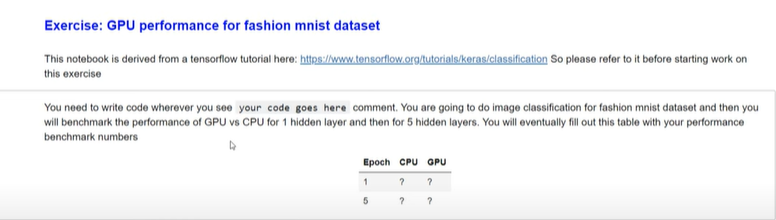

In [27]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

4423680/4422102 [==============================] - 1s 0us/step


In [28]:
train_images.shape

(60000, 28, 28)

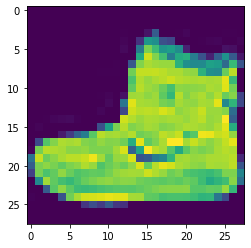

In [45]:
plt.imshow(train_images[0])

In [46]:
train_labels[0]

9

In [47]:
class_names[train_labels[0]]

'Ankle boot'

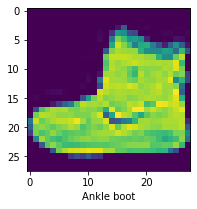

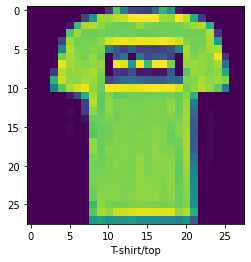

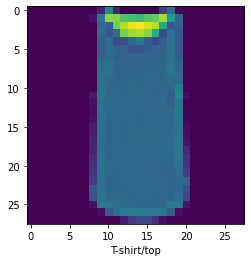

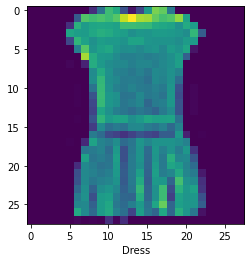

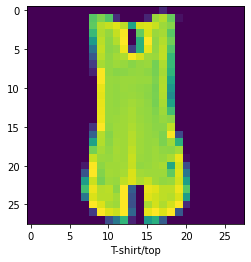

In [48]:
plt.figure(figsize=(3,3))
for i in range(5):
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
    plt.show()

In [49]:
train_images_scaled = train_images / 255.0
test_images_scaled = test_images / 255.0

In [52]:
def get_model(hidden_layers=1):
    layers = [
        keras.layers.Flatten(input_shape=(28,28)),
        keras.layers.Dense(hidden_layers,activation='relu'),
        keras.layers.Dense(10,activation='sigmoid')
    ]
    # Your code goes here-----------START
    # Create Flatten input layers
    # Create hidden layers that are equal to hidden_layers argument in this function
    # Create output 
    # Your code goes here-----------END
    model = keras.Sequential(layers)
    
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [53]:
model = get_model(1)
model.fit(train_images_scaled, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 9s 150us/sample - loss: 2.0261 - acc: 0.1561
Epoch 2/5
60000/60000 [==============================] - 6s 108us/sample - loss: 1.8501 - acc: 0.2155
Epoch 3/5
60000/60000 [==============================] - 7s 110us/sample - loss: 1.8044 - acc: 0.2192
Epoch 4/5
60000/60000 [==============================] - 6s 108us/sample - loss: 1.7823 - acc: 0.2303
Epoch 5/5
60000/60000 [==============================] - 7s 112us/sample - loss: 1.7682 - acc: 0.2470


In [56]:
np.argmax(model.predict(test_images_scaled)[2])

1

In [55]:
test_labels[2]

1

In [57]:
tf.config.experimental.list_physical_devices() 

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:DML:0', device_type='DML'),
 PhysicalDevice(name='/physical_device:DML:1', device_type='DML')]

5 Epochs performance comparison for 1 hidden layer

In [58]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    cpu_model = get_model(1)
    cpu_model.fit(train_images_scaled, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 38us/sample - loss: 1.9082 - acc: 0.2306
Epoch 2/5
60000/60000 [==============================] - 2s 40us/sample - loss: 1.6805 - acc: 0.3092
Epoch 3/5
60000/60000 [==============================] - 2s 35us/sample - loss: 1.5632 - acc: 0.3745
Epoch 4/5
60000/60000 [==============================] - 2s 36us/sample - loss: 1.4933 - acc: 0.3985
Epoch 5/5
60000/60000 [==============================] - 2s 35us/sample - loss: 1.4493 - acc: 0.4060
11.5 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [59]:
%%timeit -n1 -r1
with tf.device('/DML:0'):
    cpu_model = get_model(1)
    cpu_model.fit(train_images_scaled, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 7s 117us/sample - loss: 1.9268 - acc: 0.2043
Epoch 2/5
60000/60000 [==============================] - 7s 114us/sample - loss: 1.7043 - acc: 0.2268
Epoch 3/5
60000/60000 [==============================] - 7s 116us/sample - loss: 1.6001 - acc: 0.2763
Epoch 4/5
60000/60000 [==============================] - 7s 112us/sample - loss: 1.5426 - acc: 0.2884
Epoch 5/5
60000/60000 [==============================] - 7s 113us/sample - loss: 1.5036 - acc: 0.2951
34.8 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [60]:
%%timeit -n1 -r1
with tf.device('/DML:1'):
    cpu_model = get_model(1)
    cpu_model.fit(train_images_scaled, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 94us/sample - loss: 1.9546 - acc: 0.2045
Epoch 2/5
60000/60000 [==============================] - 5s 89us/sample - loss: 1.7216 - acc: 0.2928
Epoch 3/5
60000/60000 [==============================] - 6s 93us/sample - loss: 1.6140 - acc: 0.3615
Epoch 4/5
60000/60000 [==============================] - 5s 91us/sample - loss: 1.5558 - acc: 0.3714
Epoch 5/5
60000/60000 [==============================] - 5s 86us/sample - loss: 1.5205 - acc: 0.3772
27.6 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


5 Epocs performance comparison with 5 hidden layers

In [61]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    cpu_model = get_model(5)
    cpu_model.fit(train_images_scaled, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 42us/sample - loss: 1.0238 - acc: 0.6050
Epoch 2/5
60000/60000 [==============================] - 2s 41us/sample - loss: 0.6844 - acc: 0.7768
Epoch 3/5
60000/60000 [==============================] - 2s 41us/sample - loss: 0.6238 - acc: 0.7948
Epoch 4/5
60000/60000 [==============================] - 2s 41us/sample - loss: 0.5928 - acc: 0.8037
Epoch 5/5
60000/60000 [==============================] - 3s 47us/sample - loss: 0.5737 - acc: 0.8083
13.2 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [62]:
%%timeit -n1 -r1
with tf.device('/DML:0'):
    cpu_model = get_model(5)
    cpu_model.fit(train_images_scaled, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 10s 167us/sample - loss: 0.8139 - acc: 0.7135
Epoch 2/5
60000/60000 [==============================] - 8s 133us/sample - loss: 0.5806 - acc: 0.8010
Epoch 3/5
60000/60000 [==============================] - 7s 119us/sample - loss: 0.5464 - acc: 0.8145s - los
Epoch 4/5
60000/60000 [==============================] - 7s 118us/sample - loss: 0.5262 - acc: 0.8201
Epoch 5/5
60000/60000 [==============================] - 8s 129us/sample - loss: 0.5115 - acc: 0.8247
40.5 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [63]:
%%timeit -n1 -r1
with tf.device('/DML:1'):
    cpu_model = get_model(5)
    cpu_model.fit(train_images_scaled, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 95us/sample - loss: 0.9885 - acc: 0.6005
Epoch 2/5
60000/60000 [==============================] - 6s 93us/sample - loss: 0.6275 - acc: 0.7890
Epoch 3/5
60000/60000 [==============================] - 6s 95us/sample - loss: 0.5740 - acc: 0.8067
Epoch 4/5
60000/60000 [==============================] - 5s 91us/sample - loss: 0.5478 - acc: 0.8147
Epoch 5/5
60000/60000 [==============================] - 5s 91us/sample - loss: 0.5264 - acc: 0.82050s - loss: 0.5266
28.5 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
